In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Step 2: Load the dataset
# (Update the path if you change dataset location)
df = pd.read_csv('/kaggle/input/forcast-cover-prediction/train.csv')

# Drop 'Id' column as it's not a feature
df.drop(columns=['Id'], inplace=True)

# Preview the data
df.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
# Step 3: Split features and target
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [4]:
# Step 4: Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

✅ Accuracy: 85.52%

📋 Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.77      0.77       432
           2       0.78      0.65      0.71       432
           3       0.83      0.81      0.82       432
           4       0.93      0.97      0.95       432
           5       0.88      0.94      0.91       432
           6       0.83      0.88      0.85       432
           7       0.94      0.97      0.95       432

    accuracy                           0.86      3024
   macro avg       0.85      0.86      0.85      3024
weighted avg       0.85      0.86      0.85      3024



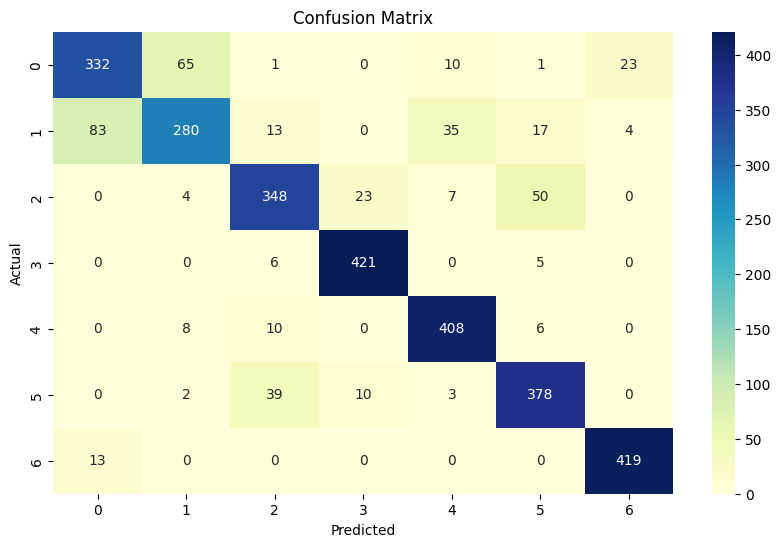

In [5]:
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy * 100:.2f}%")

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


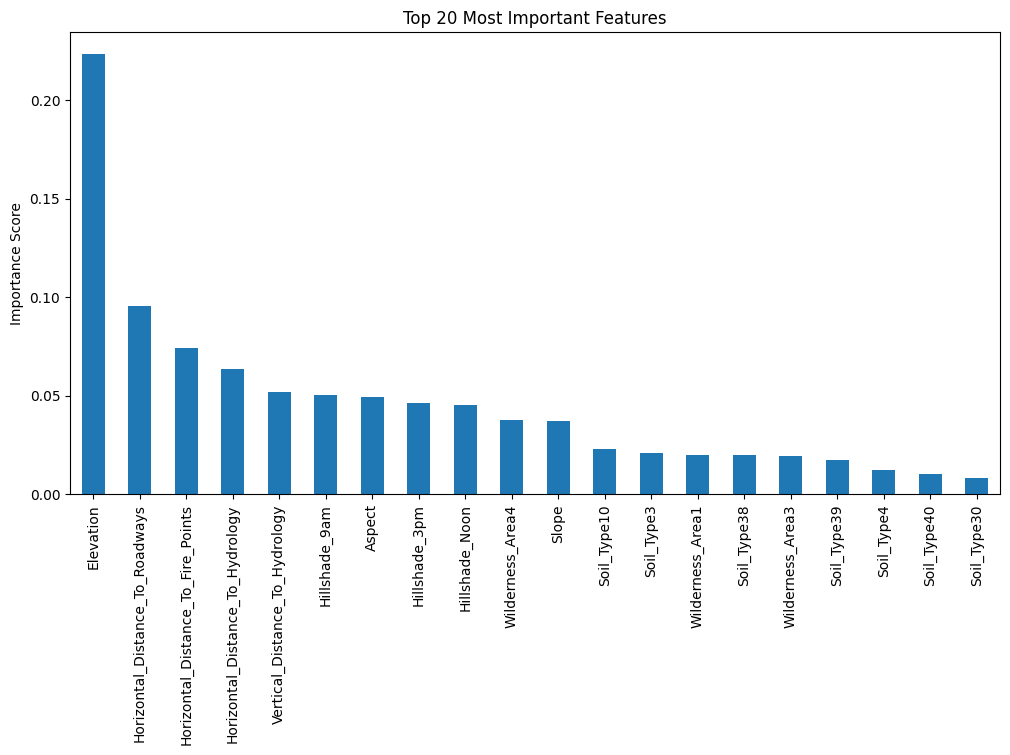

In [6]:
# Step 6: Feature Importance Plot
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
top_features.plot(kind='bar')
plt.title("Top 20 Most Important Features")
plt.ylabel("Importance Score")
plt.show()


In [7]:
# Example: Predict forest cover type for a new patch of land
new_sample = X_test.iloc[0]  # or create a custom one
new_input = new_sample.values.reshape(1, -1)
predicted_class = model.predict(new_input)[0]
print(f"🌲 Predicted Forest Cover Type: {predicted_class}")


🌲 Predicted Forest Cover Type: 4


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
